In [2]:
execfile('setting.py')

In [3]:
df1=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/01_sales_data2.csv")
df2=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/02_customer_data.csv")
df3=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/03_stock_data.csv")

In [4]:
df=pd.merge(df1,df2,on=['customer_id'],how='left')
df.shape

(282642, 15)

In [5]:
df=pd.merge(df,df3,on='product_name',how='left')
df.shape

(282642, 16)

In [3]:
df_raw=pd.read_csv("/home/piai/Downloads/css.csv")
df_raw.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,small,sightseeing,other,consignment,0,10,19.50,1.950,1,0
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,small,sightseeing,other,consignment,0,10,20.80,2.080,3,0
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,2,0
5,5,5,5,559336,22386,JUMBO BAG PINK POLKADOT,2,2021-07-07,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,3,0
6,6,6,6,546249,22386,JUMBO BAG PINK POLKADOT,6,2021-03-10,1.95,E14606,...,middle,sightseeing,west,consignment,0,6,11.70,1.170,1,0
7,7,7,7,551194,22386,JUMBO BAG PINK POLKADOT,1,2021-04-27,2.08,E14606,...,middle,sightseeing,west,consignment,0,1,2.08,0.208,2,0
8,8,8,8,556887,22386,JUMBO BAG PINK POLKADOT,2,2021-06-15,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0
9,9,9,9,557577,22386,JUMBO BAG PINK POLKADOT,2,2021-06-21,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0


In [18]:
df_product=df_raw.groupby('invoice')['product_name'].unique()

In [19]:
df_product=pd.DataFrame(df_product)

In [32]:
df_product.reset_index()

,invoice,product_name
0,539993,"[JUMBO BAG PINK POLKADOT, BLUE POLKADOT WRAP, ..."
1,540001,"[RED HANGING HEART T-LIGHT HOLDER, CERAMIC BOW..."
2,540002,"[GARDEN METAL SIGN, RED KITCHEN SCALES, VICTOR..."
3,540003,"[JAM MAKING SET PRINTED, HANGING HEART ZINC T-..."
4,540004,[ANTIQUE SILVER TEA GLASS ETCHED]
...,...,...
13576,681421,"[JUMBO BAG RED RETROSPOT, JUMBO BAG VINTAGE LE..."
13577,681426,"[RECIPE BOX RETROSPOT, LUNCH BAG APPLE DESIGN,..."
13578,681438,"[MAGIC DRAWING SLATE DOLLY GIRL, ROTATING SILV..."
13579,681445,"[GIN & TONIC DIET GREETING CARD, COLOUR GLASS ..."


In [34]:
df_product.rename(columns={'invoice':'invoice'})
df_product.columns

Index(['product_name'], dtype='object')

In [22]:
list_association=[]
for i in df_product['product_name']:
    tmp_list=list(set(i))
    tmp_list.sort()
    
    list_association.append(tmp_list)

In [25]:
df_list_association=pd.DataFrame(list_association)

In [26]:
df_list_association=pd.DataFrame(list_association)

In [29]:
df_list_association.shape

(13581, 525)

In [36]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

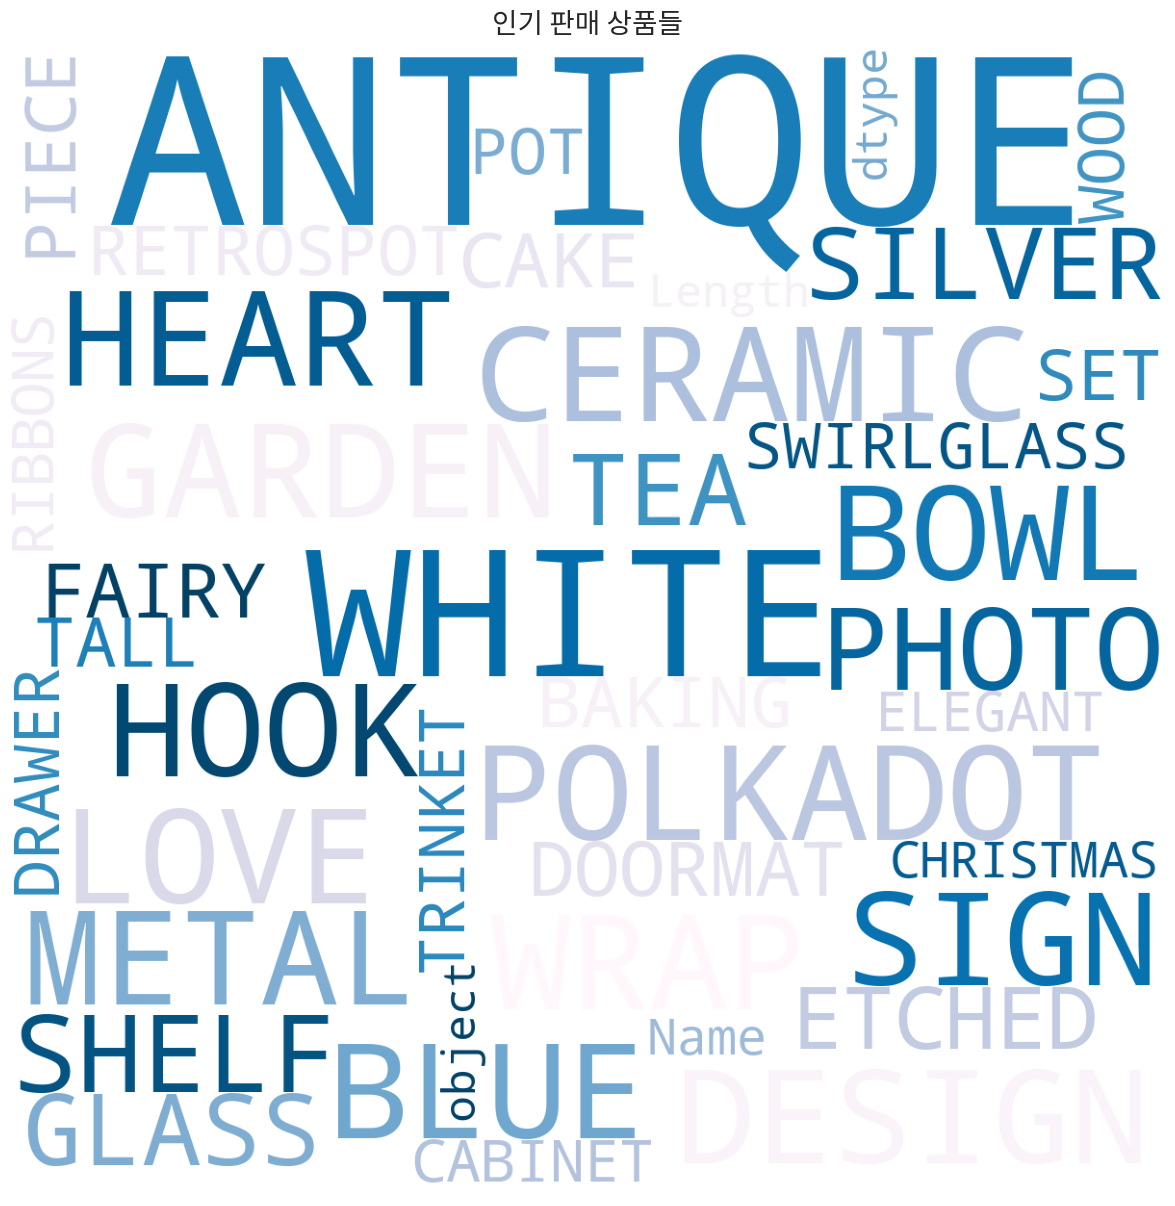

In [37]:
plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='white',colormap = 'PuBu',width=1200,height=1200,max_words=121).generate(str(df_list_association[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize=20)
plt.show

In [38]:
y = df_list_association[0].value_counts().head(100).to_frame()
y.index

Index(['ASSORTED COLOUR BIRD ORNAMENT', '6 RIBBONS RUSTIC CHARM',
       'ALARM CLOCK BAKELIKE GREEN', 'ANTIQUE SILVER T-LIGHT GLASS',
       '60 TEATIME FAIRY CAKE CASES', '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 STRIPEY MICE FELTCRAFT', 'BAKING SET 9 PIECE RETROSPOT',
       '10 COLOUR SPACEBOY PEN', '3 PIECE SPACEBOY COOKIE CUTTER SET',
       'AGED GLASS SILVER T-LIGHT HOLDER', '12 PENCIL SMALL TUBE WOODLAND',
       'ASSORTED COLOURS SILK FAN', 'ALARM CLOCK BAKELIKE CHOCOLATE',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCILS TALL TUBE POSY',
       '15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'AREA PATROLLED METAL SIGN',
       '12 COLOURED PARTY BALLOONS', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '4 TRADITIONAL SPINNING TOPS', 'BATHROOM METAL SIGN',
       '12 PENCILS SMALL TUBE SKULL', '12 PENCILS TALL TUBE RED RETROSPOT',
       '3 HEARTS HANGING DECORATION RUSTIC', '20 DOLLY PEGS RETROSPOT',
       '60 CAKE CASES DOLLY GIRL DESIGN',
       '3 DRAWER ANTIQUE WHITE WOO

In [39]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
trans = []
for i in range(0, 13581):
    trans.append([str(df_list_association.values[i,j]) for j in range(0, 525)])

# numpy array 로 변환
trans = np.array(trans)
print(trans.shape)

(13581, 525)


In [40]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(13581, 3703)

In [41]:
data.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
data = data[y.index]

In [43]:
data.head()

,ASSORTED COLOUR BIRD ORNAMENT,6 RIBBONS RUSTIC CHARM,ALARM CLOCK BAKELIKE GREEN,ANTIQUE SILVER T-LIGHT GLASS,60 TEATIME FAIRY CAKE CASES,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 STRIPEY MICE FELTCRAFT,BAKING SET 9 PIECE RETROSPOT,10 COLOUR SPACEBOY PEN,3 PIECE SPACEBOY COOKIE CUTTER SET,...,ANTIQUE GLASS PEDESTAL BOWL,50'S CHRISTMAS GIFT BAG LARGE,CHARLOTTE BAG SUKI DESIGN,CLASSIC METAL BIRDCAGE PLANT HOLDER,JUMBO BAG RED RETROSPOT,Manual,REGENCY CAKESTAND 3 TIER,12 RED ROSE PEG PLACE SETTINGS,4 IVORY DINNER CANDLES SILVER FLOCK,ALPHABET STENCIL CRAFT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
54,0.097047,(PARTY BUNTING)
64,0.091819,(JUMBO BAG RED RETROSPOT)
66,0.090862,(REGENCY CAKESTAND 3 TIER)
0,0.081953,(ASSORTED COLOUR BIRD ORNAMENT)
34,0.046756,(ALARM CLOCK BAKELIKE RED)
...,...,...
43,0.010235,(6 GIFT TAGS 50'S CHRISTMAS)
69,0.010161,"(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B..."
32,0.010161,(ANTIQUE GLASS DRESSING TABLE POT)
14,0.010088,(12 MESSAGE CARDS WITH ENVELOPES)


In [45]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.081953,(ASSORTED COLOUR BIRD ORNAMENT),1
1,0.038731,(6 RIBBONS RUSTIC CHARM),1
2,0.039393,(ALARM CLOCK BAKELIKE GREEN),1
3,0.030263,(ANTIQUE SILVER T-LIGHT GLASS),1
4,0.037332,(60 TEATIME FAIRY CAKE CASES),1
...,...,...,...
86,0.014285,"(PARTY BUNTING, REGENCY CAKESTAND 3 TIER)",2
87,0.010750,"(JUMBO BAG RED RETROSPOT, CHARLOTTE BAG SUKI D...",2
88,0.011413,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3
89,0.012738,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3


In [46]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
88,0.011413,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3
89,0.012738,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3
90,0.010309,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",3


In [47]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
67,0.014285,"(ASSORTED COLOUR BIRD ORNAMENT, PARTY BUNTING)",2
68,0.013990,"(ASSORTED COLOUR BIRD ORNAMENT, REGENCY CAKEST...",2
69,0.010161,"(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...",2
70,0.014506,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",2
71,0.025992,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2
72,0.012002,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",2
73,0.015978,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",2
74,0.012223,"(60 TEATIME FAIRY CAKE CASES, 72 SWEETHEART FA...",2
75,0.010750,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2
76,0.017745,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2


In [48]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.1)
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.015978,0.046756,0.012738,0.797235,17.050786,0.011991,4.701224
44,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.014506,0.046756,0.011413,0.786802,16.827651,0.010735,4.471166
56,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.013107,0.046756,0.010309,0.786517,16.821552,0.009696,4.465193
25,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.028496,0.046756,0.020028,0.702842,15.031972,0.018696,3.207872
19,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.025477,0.046756,0.017745,0.696532,14.897005,0.016554,3.141164
17,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.015610,0.046756,0.010750,0.688679,14.729060,0.010020,3.061934
23,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.021648,0.046756,0.014579,0.673469,14.403760,0.013567,2.919308
9,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.039393,0.046756,0.025992,0.659813,14.111687,0.024150,2.802117
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.015610,0.039393,0.010161,0.650943,16.524229,0.009546,2.752008
42,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",(ALARM CLOCK BAKELIKE GREEN),0.017745,0.039393,0.011413,0.643154,16.326482,0.010714,2.691933


In [50]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.015978,0.046756,0.012738,0.797235,17.050786,0.011991,4.701224
14,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.014506,0.046756,0.011413,0.786802,16.827651,0.010735,4.471166
19,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.013107,0.046756,0.010309,0.786517,16.821552,0.009696,4.465193
10,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.028496,0.046756,0.020028,0.702842,15.031972,0.018696,3.207872
7,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.025477,0.046756,0.017745,0.696532,14.897005,0.016554,3.141164
6,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.015610,0.046756,0.010750,0.688679,14.729060,0.010020,3.061934
9,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.021648,0.046756,0.014579,0.673469,14.403760,0.013567,2.919308
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.039393,0.046756,0.025992,0.659813,14.111687,0.024150,2.802117
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.015610,0.039393,0.010161,0.650943,16.524229,0.009546,2.752008
13,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",(ALARM CLOCK BAKELIKE GREEN),0.017745,0.039393,0.011413,0.643154,16.326482,0.010714,2.691933


In [52]:
df_ar = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.1)
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [53]:
df_ar = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.1)
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.015978,0.046756,0.012738,0.797235,17.050786,0.011991,4.701224
44,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.014506,0.046756,0.011413,0.786802,16.827651,0.010735,4.471166
56,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.013107,0.046756,0.010309,0.786517,16.821552,0.009696,4.465193
25,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.028496,0.046756,0.020028,0.702842,15.031972,0.018696,3.207872
19,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.025477,0.046756,0.017745,0.696532,14.897005,0.016554,3.141164
17,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.015610,0.046756,0.010750,0.688679,14.729060,0.010020,3.061934
23,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.021648,0.046756,0.014579,0.673469,14.403760,0.013567,2.919308
9,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.039393,0.046756,0.025992,0.659813,14.111687,0.024150,2.802117
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.015610,0.039393,0.010161,0.650943,16.524229,0.009546,2.752008
42,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",(ALARM CLOCK BAKELIKE GREEN),0.017745,0.039393,0.011413,0.643154,16.326482,0.010714,2.691933


In [54]:
df_ar.to_csv("/home/piai/다운로드/result.csv")